# Practical implementation of linear regression on BOSTON dataset.

In [2]:
#importing the necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df.shape

(506, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# setting independent and dependent features
y = df.pop('MEDV')
X = df

In [7]:
# splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [15]:
# creating the linear regression model

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# crossvalidating the model
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cvs

array([-24.85792467, -32.34889563, -29.41534458, -18.46226827,
       -24.80445401])

In [17]:
cvs.mean()

-25.977777430926288

In [19]:
# predicting the values
preds = lr_model.predict(X_test)
print(np.asarray(preds))

[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988 23.14668944
 17.3921241  14.07859899 23.03692679 20.59943345 24.82286159 18.53057049
 -6.86543527 21.80172334 19.22571177 26.19191985 20.27733882  5.61596432
 40.44887974 17.57695918 27.44319095 30.1715964  10.94055823 24.02083139
 18.07693812 15.934748   23.12614028 14.56052142 22.33482544 19.3257627
 22.16564973 25.19476081 25.31372473 18.51345025 16.6223286  17.50268505
 30.94992991 20.19201752 23.90440431 24.86975466 13.93767876 31.82504715
 42.56978796 17.62323805 27.01963242 17.19006621 13.80594006 26.10356557
 20.31516118 30.08649576 21.3124053  34.15739602 15.60444981 26.11247588
 39.31613646 22.99282065 18.95764781 33.05555669 24.85114223 12.91729352
 22.68101452 30.80336295 31.63522027 16.29833689 21.07379993 16.57699669
 20.36362023 26.15615896 31.06833034 11.98679953 20.42550472 27.55676301
 10.94316981 16.82660609 23.92909733  5.28065815 21.43504661 41.33684993
 18.22211675  9.48269245 21.19857446 12.95001331 21.

In [40]:
type(y_test.values)

numpy.ndarray

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

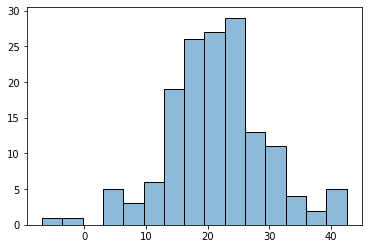

In [69]:
# visualizing the differences between predictions and actual value
sns.histplot(preds, kde=True)

In [20]:
y_t = y_test.values

vals = np.asarray(preds)-y_t
type(vals)

numpy.ndarray

<AxesSubplot:ylabel='Count'>

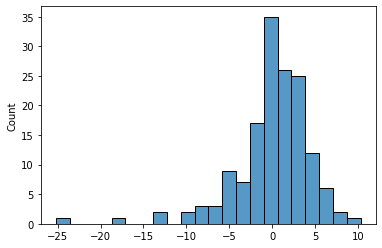

In [21]:
vals = np.asarray(preds)-y_t
type(vals)
sns.histplot(vals)

In [22]:
from sklearn.metrics import r2_score
r2_score(preds, y_test)

0.6693702691495593

## Ridge regression

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [9]:
ridge_rgr = Ridge()

In [11]:
parameters = {'alpha':[1,2,3,7,10,12,15,20,30,45,60]}
ridgecv = GridSearchCV(ridge_rgr, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 7, 10, 12, 15, 20, 30, 45, 60]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 12}
-25.80091234888739


In [23]:
ridge_preds = ridgecv.predict(X_test)
r2_score(ridge_preds, y_test)

0.6428726645653313

<AxesSubplot:ylabel='Count'>

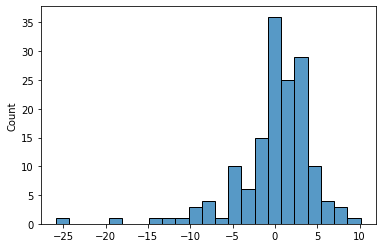

In [36]:
vals = (ridge_preds-y_test).values
type(vals)
sns.histplot(vals)

In [34]:
vals = (ridge_preds-y_test).values
type(vals)

numpy.ndarray

## Lasso regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_rgr = Lasso()

In [44]:
parameters = {'alpha':[1,2,3,7,10,12,15,20,30,45,60]}
lassocv = GridSearchCV(lasso_rgr, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 7, 10, 12, 15, 20, 30, 45, 60]},
             scoring='neg_mean_squared_error')

In [45]:
print(lassocv.best_params_)
lassocv.best_score_

{'alpha': 1}


-31.153603752119004

In [46]:
lasso_preds = lassocv.predict(X_test)
r2_score(lasso_preds, y_test)

0.32577461229516536

In [50]:
vals = np.array(lasso_preds-y_test)
type(vals)

numpy.ndarray

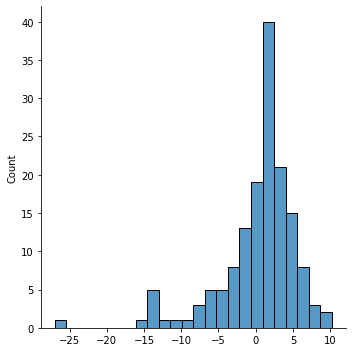

In [51]:
sns.displot(vals)

## Based on the comparision, lasso has low r2 score it is because, it simply eliminates the features as it tries to penalize the best fit line.

# Checking for the multi-collinearity

In [4]:
print(df.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

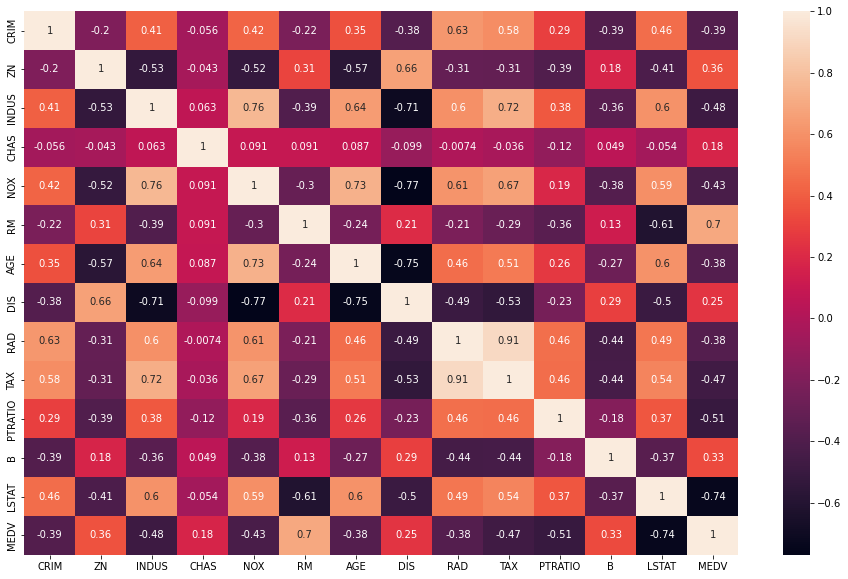

In [6]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
import statsmodels.api as sm

In [11]:
# fit a ols model with intercept 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          6.72e-135
Time:                        09:43:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### F-statistic value and p value helps to reject the null hypothesis
### since the p value is < 0.05, and large f-statistic value represents that there is a linear relationship between the features and target variable

## if p > 0.05, then we fail to reject the null hypothesis which is the coefficient of that particular feature is having a value 0, therefore that feature becomes irrlevant to our model basically we can drop that feature